In [71]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Titanic dataset

**Classification problem**

In [52]:
data = pd.read_csv('./data/titanic_train.csv')
data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [53]:
data.sort_values(by='Ticket').head()

PassengerId  Survived  Pclass  \
504          505         1       1   
257          258         1       1   
759          760         1       1   
262          263         0       1   
558          559         1       1   

                                                  Name     Sex   Age  SibSp  \
504                              Maioni, Miss. Roberta  female  16.0      0   
257                               Cherry, Miss. Gladys  female  30.0      0   
759  Rothes, the Countess. of (Lucy Noel Martha Dye...  female  33.0      0   
262                                  Taussig, Mr. Emil    male  52.0      1   
558             Taussig, Mrs. Emil (Tillie Mandelbaum)  female  39.0      1   

     Parch  Ticket   Fare Cabin Embarked  
504      0  110152  86.50   B79        S  
257      0  110152  86.50   B77        S  
759      0  110152  86.50   B77        S  
262      1  110413  79.65   E67        S  
558      1  110413  79.65   E67        S

In [54]:
data['Survived'].value_counts(normalize=True) * 100

0    61.616162
1    38.383838
Name: Survived, dtype: float64

Imbalanced

In [61]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
data['Age'].fillna(1000, inplace=True)
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
X, y = data.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin' , 'Embarked'], axis = 1), data.Survived
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.6,
                                                    test_size=0.4,
                                                    random_state=42, stratify = y)

classifier = LogisticRegression()

pipeline = Pipeline([('classifier', classifier)])
model = pipeline.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [62]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import make_column_transformer
classifier = LogisticRegression()
categorical_features = ['Sex',]
numerical_features = ['Fare',]
pipeline = make_pipeline(
    make_column_transformer(
        (OneHotEncoder(), categorical_features),
        (StandardScaler(), numerical_features),
        remainder='passthrough', verbose_feature_names_out=False),
    LinearRegression()
)
model = pipeline.fit(X_train, y_train)
t = pipeline[0]
t.get_feature_names_out()

array(['Sex_0', 'Sex_1', 'Fare', 'PassengerId', 'Pclass', 'Age', 'SibSp',
       'Parch'], dtype=object)

In [63]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       220
           1       0.79      0.69      0.74       137

    accuracy                           0.81       357
   macro avg       0.80      0.79      0.79       357
weighted avg       0.81      0.81      0.81       357



In [47]:
profile = ProfileReport(data, explorative=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

##  **Metric** <br>
F1 score, that balance precision and recal. We need to maximize how many true positives we found (recall), and how many positives from our prediction are true positives (recall)<br>
##  **Validation** <br>
K-fold cross-valdation. I think no need to strarify it, as there are two classes and they well represented. SOme options to deal with imbalance might be to set up class weights to the model.

# Petfinder Pawpularity Score

**Regression problem**

In [48]:
data = pd.read_csv('./data/train_petfinder.csv')
data.head()

Id  Subject Focus  Eyes  Face  Near  Action  \
0  0007de18844b0dbbb5e1f607da0606e0              0     1     1     1       0   
1  0009c66b9439883ba2750fb825e1d7db              0     1     1     0       0   
2  0013fd999caf9a3efe1352ca1b0d937e              0     1     1     1       0   
3  0018df346ac9c1d8413cfcc888ca8246              0     1     1     1       0   
4  001dc955e10590d3ca4673f034feeef2              0     0     0     1       0   

   Accessory  Group  Collage  Human  Occlusion  Info  Blur  Pawpularity  
0          0      1        0      0          0     0     0           63  
1          0      0        0      0          0     0     0           42  
2          0      0        0      1          1     0     0           28  
3          0      0        0      0          0     0     0           15  
4          0      1        0      0          0     0     0           72

<AxesSubplot:>

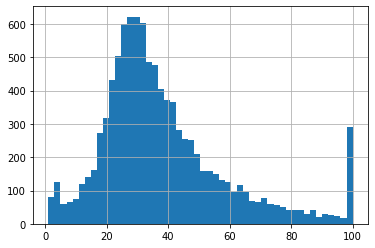

In [49]:
data.Pawpularity.hist(bins=50)

## **Metric** <br/>
RMSE used when large errors are particularly undesirable. In case of pawpularity, we want to avoid high errors and predict pawpularity as close as possible (penilize hight errors).<br/>
## **Validation** <br/>
Stratified K-fold. We want to verify that we trained/tested on different values of Pawpularity (low, medium, high scores), so our folds should include different values.

# Web Traffic Time Series

**Regression problem**

In [65]:
data = pd.read_csv('./data/train_1.csv')
data.head(10)

Page  2015-07-01  2015-07-02  \
0            2NE1_zh.wikipedia.org_all-access_spider        18.0        11.0   
1             2PM_zh.wikipedia.org_all-access_spider        11.0        14.0   
2              3C_zh.wikipedia.org_all-access_spider         1.0         0.0   
3         4minute_zh.wikipedia.org_all-access_spider        35.0        13.0   
4  52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...         NaN         NaN   
5            5566_zh.wikipedia.org_all-access_spider        12.0         7.0   
6          91Days_zh.wikipedia.org_all-access_spider         NaN         NaN   
7           A'N'D_zh.wikipedia.org_all-access_spider       118.0        26.0   
8           AKB48_zh.wikipedia.org_all-access_spider         5.0        23.0   
9           ASCII_zh.wikipedia.org_all-access_spider         6.0         3.0   

   2015-07-03  2015-07-04  2015-07-05  2015-07-06  2015-07-07  2015-07-08  \
0         5.0        13.0        14.0         9.0         9.0        22.0   
1        15.0        18.0        11.0        13.0        22.0        11.0   
2         1.0         1.0         0.0         4.0         0.0         3.0   
3        10.0        94.0         4.0        26.0        14.0         9.0   
4         NaN         NaN         NaN         NaN         NaN         NaN   
5         4.0         5.0        20.0         8.0         5.0        17.0   
6         NaN         NaN         NaN         NaN         NaN         NaN   
7        30.0        24.0        29.0       127.0        53.0        37.0   
8        14.0        12.0         9.0         9.0        35.0        15.0   
9         5.0        12.0         6.0         5.0         4.0        13.0   

   2015-07-09  ...  2016-12-22  2016-12-23  2016-12-24  2016-12-25  \
0        26.0  ...        32.0        63.0        15.0        26.0   
1        10.0  ...        17.0        42.0        28.0        15.0   
2         4.0  ...         3.0         1.0         1.0         7.0   
3        11.0  ...        32.0        10.0        26.0        27.0   
4         NaN  ...        48.0         9.0        25.0        13.0   
5        24.0  ...        16.0        27.0         8.0        17.0   
6         NaN  ...         2.0         7.0        33.0         8.0   
7        20.0  ...        64.0        35.0        35.0        28.0   
8        14.0  ...        34.0       105.0        72.0        36.0   
9         9.0  ...        25.0        17.0        22.0        29.0   

   2016-12-26  2016-12-27  2016-12-28  2016-12-29  2016-12-30  2016-12-31  
0        14.0        20.0        22.0        19.0        18.0        20.0  
1         9.0        30.0        52.0        45.0        26.0        20.0  
2         4.0         4.0         6.0         3.0         4.0        17.0  
3        16.0        11.0        17.0        19.0        10.0        11.0  
4         3.0        11.0        27.0        13.0        36.0        10.0  
5        32.0        19.0        23.0        17.0        17.0        50.0  
6        11.0         4.0        15.0         6.0         8.0         6.0  
7        20.0        23.0        32.0        39.0        32.0        17.0  
8        33.0        30.0        36.0        38.0        31.0        97.0  
9        30.0        29.0        35.0        44.0        26.0        41.0  

[10 rows x 551 columns]

## **Metric** <br/>
MAPE, as it more robust to outlifters (pages, that got more views)<br/>
## **Validation** <br/>
Time validation. Values for test/validation set should be after train(dates after dates in train).Start with a small subset of data for training purpose, forecast for the later data points and then checking the accuracy for the forecasted data points. The same forecasted data points are then included as part of the next training dataset and subsequent data points are forecasted.
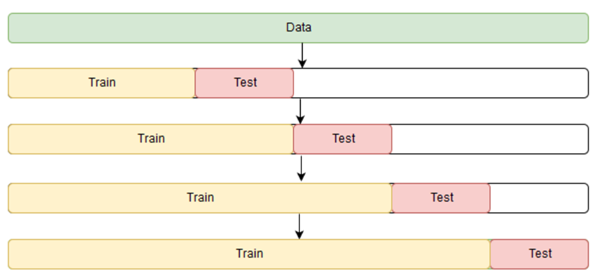

# Toxic Comment

**Classification problem**

In [68]:
data = pd.read_csv('./data/train.csv')
data.head(10)

id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   
5  00025465d4725e87  "\n\nCongratulations from me as well, use the ...      0   
6  0002bcb3da6cb337       COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK      1   
7  00031b1e95af7921  Your vandalism to the Matt Shirvington article...      0   
8  00037261f536c51d  Sorry if the word 'nonsense' was offensive to ...      0   
9  00040093b2687caa  alignment on this subject and which are contra...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0  
5             0        0       0       0              0  
6             1        1       0       1              0  
7             0        0       0       0              0  
8             0        0       0       0              0  
9             0        0       0       0              0

/home/i.kozlov/venv/mlcourse/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


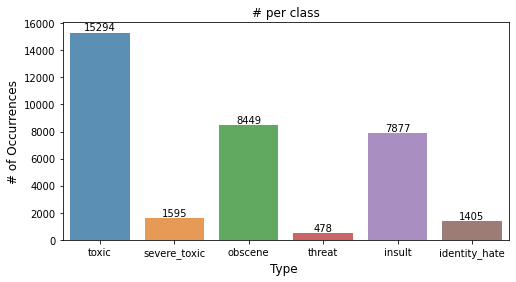

In [72]:
x=data.iloc[:,2:].sum()
#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("# per class")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('Type ', fontsize=12)
#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

Inbalanced classes

<AxesSubplot:>

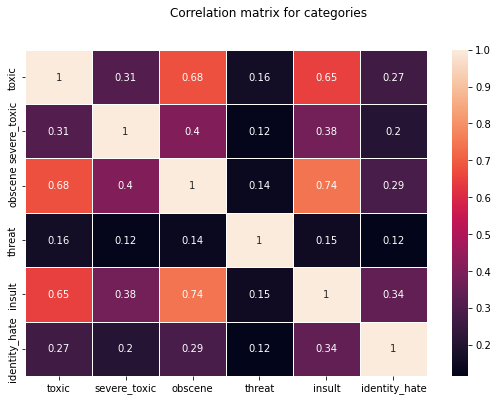

In [74]:
f, ax = plt.subplots(figsize=(9, 6))
f.suptitle('Correlation matrix for categories')
sns.heatmap(data.iloc[:,2:].corr(), annot=True, linewidths=.5, ax=ax)

'toxic' highly coreletaed with 'insult'  'obscene'
'insult' highly coreletaed with 'obscene'

## **Metric** <br/>
Main requirments - count on class imbalance. Metric should be good in separating classes. F1 score should be good.<br/>
## **Validation** <br/>
Stratified K-Fold (to cover all the classes). The dataset is imbalanced. Most of the comments doesnt belong to any of classes, and classes like threat, identity hate and severe toxic presented poorly